## Tutorial 1

### Primeiros passos

In [165]:
# Carregando as librarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point
import folium
import ee
import geemap

Onde buscar informação sobre os pacotes: [PyPi](https://pypi.org/)  
Confere o [Python API](https://developers.google.com/earth-engine/guides/python_install)  
Confere o [geemap](https://geemap.org/)  

In [100]:
# Mostrar todas as linhas do banco de dados
pd.set_option('display.max_rows', None)

In [101]:
# Carregando os dados
dados = pd.read_csv("dataset.csv", sep = ';')

In [102]:
# Uma visão resumida
dados.head()

,X,Y,Clay.gkg,OM.gkg
0,-47.431591,-22.773409,301,22.21
1,-47.449435,-22.841908,503,25.02
2,-47.378210,-22.856072,120,15.00
3,-47.375972,-22.864430,128,8.00
4,-47.372973,-22.868192,117,11.00


In [104]:
# Conhecendo o shape
print('O conjunto de dados tem {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

O conjunto de dados tem 388 linhas e 4 colunas


Para uma explicação sobre o .format(): https://www.w3schools.com/python/ref_string_format.asp

In [105]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         388 non-null    float64
 1   Y         388 non-null    float64
 2   Clay.gkg  388 non-null    int64  
 3   OM.gkg    388 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.2 KB


In [9]:
# Checkando valores nulos
dados.isnull().sum()

X           0
Y           0
Clay.gkg    0
OM.gkg      0
dtype: int64

In [106]:
# Descrever os dados
dados.describe()

,X,Y,Clay.gkg,OM.gkg
count,388.000000,388.000000,388.000000,388.000000
mean,-47.405859,-22.865197,267.840206,18.600335
std,0.028572,0.029960,161.258360,6.365130
min,-47.457000,-22.907360,13.000000,5.800000
25%,-47.429812,-22.889000,124.000000,13.200000
50%,-47.402296,-22.874463,234.500000,17.900000
75%,-47.384326,-22.842459,418.500000,23.025000
max,-47.345924,-22.773409,638.000000,39.000000


In [107]:
# Trocando os nomes das colunas
dict_name = {'X': 'Lat', 'Y': 'Long', 'Clay.gkg': 'Clay', 'OM.gkg': 'OM'}
dados.rename(columns = dict_name, inplace = True)
dados.head()

,Lat,Long,Clay,OM
0,-47.431591,-22.773409,301,22.21
1,-47.449435,-22.841908,503,25.02
2,-47.378210,-22.856072,120,15.00
3,-47.375972,-22.864430,128,8.00
4,-47.372973,-22.868192,117,11.00


In [108]:
# Criando uma lista
lista = ['Lat', 'Long']
lista

['Lat', 'Long']

In [109]:
# Utilizando a lista para selecionar algumas colunas
xy = dados[lista]
xy.head()

,Lat,Long
0,-47.431591,-22.773409
1,-47.449435,-22.841908
2,-47.378210,-22.856072
3,-47.375972,-22.864430
4,-47.372973,-22.868192


### Gráficos

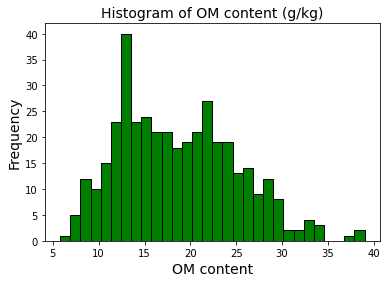

In [124]:
# Plotando o histograma da materia orgânica
plt.hist(dados['OM'], bins = 30, color = 'green', edgecolor='black')
plt.title('Histogram of OM content (g/kg)', fontsize = 14)
plt.xlabel('OM content', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

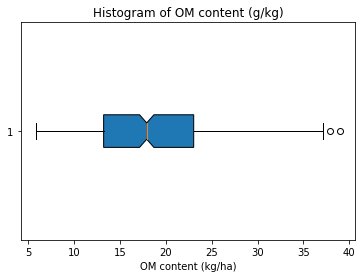

In [98]:
# Plotando o boxplot da materia orgânica
plt.boxplot(dados['OM'], patch_artist = True,
                notch ='True', vert = False)
plt.title('Histogram of OM content (g/kg)')
plt.xlabel('OM content (kg/ha)')
plt.show()

Veja mais nesse [link](https://realpython.com/python-zip-function/#:~:text=Python's%20zip()%20function%20is,%2C%20sets%2C%20and%20so%20on.) sobre a função zip() e neste [link](https://realpython.com/list-comprehension-python/) sobre list comprehension.

In [115]:
xy = Point(dados['Lat'].iloc[0], dados['Long'].iloc[0])
list(xy.coords)

[(-47.43159128, -22.77340888)]

In [131]:
## Converter pandas dataframe para geopandas
geo_xy = [Point(xy) for xy in zip(dados['Lat'], dados['Long'])]  # List comprehension e zip()
dataset_gp = gp.GeoDataFrame(dados, crs = "EPSG:4326", geometry = geo_xy)
dataset_gp.head()

,Lat,Long,Clay,OM,geometry
0,-47.431591,-22.773409,301,22.21,POINT (-47.43159 -22.77341)
1,-47.449435,-22.841908,503,25.02,POINT (-47.44944 -22.84191)
2,-47.378210,-22.856072,120,15.00,POINT (-47.37821 -22.85607)
3,-47.375972,-22.864430,128,8.00,POINT (-47.37597 -22.86443)
4,-47.372973,-22.868192,117,11.00,POINT (-47.37297 -22.86819)


In [ ]:
for xy in zip(dados['Lat'], dados['Long']):
    print(xy)

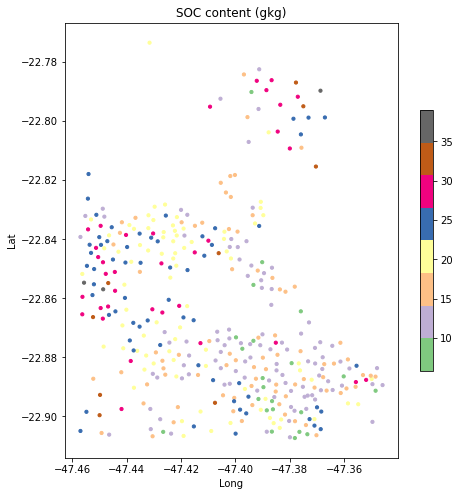

In [133]:
## Plot the points 
fig, ax = plt.subplots(figsize = (8, 8))
dataset_gp.plot(ax= ax, column = 'OM', marker = 'o', markersize = 10, cmap = 'Accent', legend = True, 
               legend_kwds = {'shrink': 0.6})
ax.set_title('SOC content (gkg)')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.show()

In [135]:
## Plot in an interative base map to know where the 
coords = [-22.84, -47.4]
my_map = folium.Map(location = coords, zoom_start = 12)
folium.GeoJson(data=dataset_gp["geometry"]).add_to(my_map)
my_map

### Carregando imagens do GEE

In [184]:
ee.Authenticate()

Enter verification code: 4/1AdQt8qg1IG0bgpnrB5z8abIv1pOgBAB5D8_FlrR5DNsUisRwW0-uwdQ58tw

Successfully saved authorization token.


In [185]:
ee.Initialize()

In [186]:
geometry = ee.Geometry.Rectangle([-47.4974254246406247,-22.9404985747395820, -47.3317077955920169,-22.7588277751145860])
startDate = '2021-01-01'
endDate = '2021-12-31'
s2a = (ee.ImageCollection("COPERNICUS/S2_SR")
         .filterBounds(geometry)
         .filterDate(startDate, endDate)
         .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', 10)
         .select(['B2','B3','B4','B5','B6','B7','B8','B8A','B9','B11','B12'])
         .map(lambda img: img.set('date', ee.Date(img.date()).format('YYYYMMdd')))
         .sort('date'))

In [146]:
# Numero de imagens
count = s2a.size()
print('Count: ', str(count.getInfo()))

Count:  71


In [147]:
# Conferindo as datas
timestamplist = (s2a.aggregate_array('date')
                 .map(lambda d: ee.String(d))
                 .getInfo())
timestamplist

['20210104',
 '20210203',
 '20210203',
 '20210218',
 '20210218',
 '20210223',
 '20210223',
 '20210310',
 '20210310',
 '20210315',
 '20210315',
 '20210325',
 '20210325',
 '20210330',
 '20210330',
 '20210409',
 '20210409',
 '20210414',
 '20210414',
 '20210424',
 '20210424',
 '20210429',
 '20210429',
 '20210509',
 '20210509',
 '20210514',
 '20210514',
 '20210519',
 '20210519',
 '20210603',
 '20210603',
 '20210613',
 '20210613',
 '20210703',
 '20210703',
 '20210708',
 '20210708',
 '20210713',
 '20210713',
 '20210718',
 '20210718',
 '20210723',
 '20210723',
 '20210802',
 '20210802',
 '20210817',
 '20210817',
 '20210822',
 '20210822',
 '20210901',
 '20210901',
 '20210906',
 '20210906',
 '20210926',
 '20210926',
 '20211006',
 '20211006',
 '20211105',
 '20211105',
 '20211110',
 '20211110',
 '20211125',
 '20211125',
 '20211205',
 '20211205',
 '20211210',
 '20211210',
 '20211220',
 '20211220',
 '20211225',
 '20211225']

In [190]:
s2a_median = s2a.mean()
s2a_median

In [191]:
def calNDVI(image):
    ndvi = image.normalizedDifference(['B8A','B4']).rename("NDVI")
    image = image.addBands(ndvi)

    return(image)

In [193]:
s2a_with_ndvi = calNDVI(s2a_median)

In [194]:
s2a_with_ndvi.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B5',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B6',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B7',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min

In [166]:
## Esse método não funcionou !!
task = ee.batch.Export.image.toDrive(**{
    'image': s2a_with_ndvi, 
    'description': 's2a',
    'folder': 's2', 
    'scale': 20, 
    'maxPixels':1e9, 
    'region': geometry.getInfo()['coordinates'],
    'crs':'EPSG:4326',
    'fileFormat':'GeoTIFF'})
task.start()

In [180]:
# Exportando a imagem
url = s2a_with_ndvi.getDownloadUrl({
    'region': geometry,
    'scale': 50,
    'format': 'GEO_TIFF'
})
response = requests.get(url)
with open('s2a.tif', 'wb') as img:
    img.write(response.content)

Confere este [link](https://www.w3schools.com/python/ref_func_open.asp) para uma explicação da função **open()**.   

Confere esse [link](https://leimao.github.io/blog/File-IO-Binary-VS-Text/) para uma explicação do 'binary' mode.  

[Link](https://code.earthengine.google.com/f04e265059d26fc02d2e7816d417d2eb) do GEE